In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# 재료 기본 데이터 가져오기
filepath = "./data/레시피 기본정보.xlsx"
df = pd.read_excel(filepath)
rcp_label = pd.DataFrame.copy(df)

# 재료 정보 데이터 가져오기
filepath = "./data/레시피 재료정보.xlsx"
df = pd.read_excel(filepath)
rcp_igd = pd.DataFrame.copy(df)

In [4]:
# 재료 데이터 분석

rcp_igd.describe(include="all")

,레시피 코드,재료순번,재료명,재료용량,재료타입 코드,재료타입명
count,6104.000000,6104.000000,6104,6088,6.104000e+03,6104
unique,NaN,NaN,747,381,NaN,3
top,NaN,NaN,소금,약간,NaN,양념
freq,NaN,NaN,340,1051,NaN,2645
mean,6336.500491,8963.327326,NaN,NaN,3.060002e+06,NaN
std,26446.895196,26310.645564,NaN,NaN,8.189225e-01,NaN
min,1.000000,1.000000,NaN,NaN,3.060001e+06,NaN
25%,138.000000,1526.750000,NaN,NaN,3.060001e+06,NaN
50%,268.000000,3052.500000,NaN,NaN,3.060002e+06,NaN
75%,408.250000,4578.250000,NaN,NaN,3.060003e+06,NaN


In [5]:
# 열 추출
rcp_igd = rcp_igd.iloc[:,[0,1,2,3,5]]

In [6]:
# df 기본 정보 변수로 저장하기
rcp_igd_rows = rcp_igd.shape[0]
rcp_igd_cols = rcp_igd.shape[1]

In [7]:
# 각 레시피 코드 별 재료 개수 파악하기
rcp_igd_summary = pd.DataFrame(rcp_igd.iloc[:,[0,4]].value_counts())
rcp_igd_summary = rcp_igd_summary.sort_values('레시피 코드')

In [8]:
rcp_igd_summary


count
레시피 코드 재료타입명       
1      주재료        9
       양념         6
       부재료        2
2      주재료        2
       양념         1
       부재료        4
3      부재료        5
       주재료        4
       양념         6
4      양념         8
       주재료        3
5      부재료        3
       양념         7
       주재료        1
6      양념         3
       부재료        1
       주재료        2
7      양념         3
       주재료        2
8      부재료        5
       양념         3
       주재료        2
9      부재료        6
       주재료        2
       양념         6
10     주재료        2
       부재료        3
       양념         6
11     양념         3
       주재료        3
       부재료        5
12     주재료        3
       양념         6
       부재료        3
13     주재료        2
       부재료        3
       양념         8
14     부재료        4
       주재료        4
       양념         1
15     양념         6
       부재료        4
       주재료        4
16     부재료        3
       주재료        4
       양념         8
17     주재료        1
       부재료        3
       양념         5
18     주재료        2
       양념         6
       부재료        1
19     양념         3
       주재료        3
       부재료        5
20     양념         5
       부재료        2
       주재료        2
21     양념         4
       주재료        2
       부재료        2
22     양념         6
       부재료        2
       주재료        1
23     주재료        1
       양념         3
       부재료        5
24     양념         5
       주재료        1
       부재료        5
25     양념         8
       부재료        3
       주재료        2
26     양념         1
       주재료       10
       부재료        5
27     부재료        2
       주재료        1
       양념         1
28     주재료        3
       부재료        6
       양념         3
29     주재료        3
       양념        12
30     부재료        2
       양념         6
       주재료        4
31     주재료        2
       부재료        2
       양념         1
32     주재료        2
       부재료        2
       양념         8
33     부재료        2
       주재료        2
       양념         5
34     양념         5
       부재료        2
       주재료        3
35     주재료        1
       양념         7
36     양념         5
       주재료        1
37     부재료        1
       양념         4
       주재료        3
38     양념         4
       부재료        3
       주재료        1
39     양념         9
       주재료        2
       부재료        3
40     부재료        3
       주재료        1
       양념         5
41     양념         7
       부재료        4
       주재료        1
42     주재료        2
       부재료        1
       양념         2
43     양념         8
       주재료        3
       부재료        5
44     부재료        5
       주재료        4
       양념         8
45     부재료        1
       양념         2
       주재료        2
46     주재료        1
       양념        10
47     주재료        3
       부재료        8
       양념         8
48     주재료        1
       부재료        2
       양념        15
49     주재료        1
       부재료       10
       양념         6
50     주재료        5
       부재료        5
       양념         9
51     부재료        6
       양념         8
       주재료        4
52     주재료        1
       부재료        3
       양념         9
53     양념         3
       부재료        4
       주재료        3
54     주재료        1
       부재료        8
       양념         4
55     주재료        2
       양념         5
       부재료        6
56     부재료        2
       양념         4
       주재료        3
57     양념         7
       주재료        3
       부재료        2
58     부재료        4
       주재료        3
       양념         4
59     부재료        2
       양념         4
       주재료        3
60     양념         8
       주재료        6
       부재료        3
61     양념         7
       주재료        3
       부재료        1
62     양념         7
       주재료        5
       부재료        4
63     양념         3
       주재료        2
       부재료        5
64     양념         7
       부재료        3
       주재료        2
65     양념         4
       부재료        3
       주재료        3
66     주재료        1
       양념         9
       부재료        3
67     부재료        3
       양념         6
       주재료        2
68     주재료        3
       부재료        4
       양념         2
69     부재료    

<Axes: xlabel='레시피 코드,재료타입명'>

C:\Users\SSAFY\anaconda3\envs\ml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
C:\Users\SSAFY\anaconda3\envs\ml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\SSAFY\anaconda3\envs\ml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  func(*args, **kwargs)
C:\Users\SSAFY\anaconda3\envs\ml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\SSAFY\anaconda3\envs\ml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45392 (\N{HANGUL SYLLABLE NYEOM}) missing from current font.
  func(*args, **kwargs)
C:\Users\SSAFY\anaconda3\envs\ml\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 4

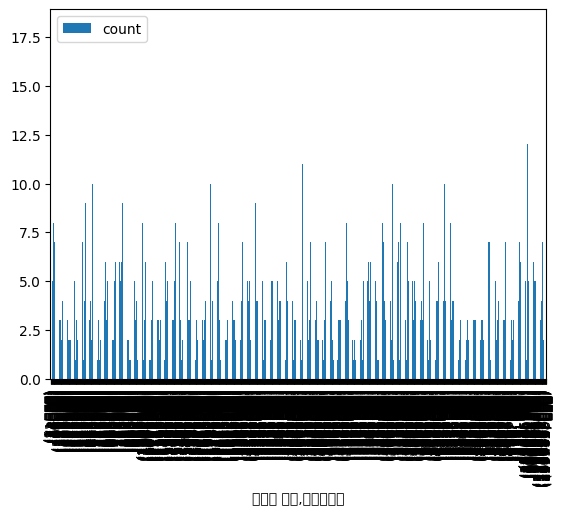

In [9]:
C.plot(kind='bar')

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

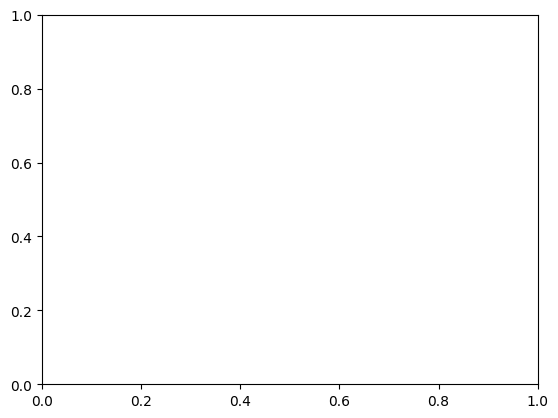

In [10]:
plt.bar(rcp_igd.iloc[:,[0,4]].value_counts().index, rcp_igd.iloc[:,[0,4]].value_counts().count)

In [12]:
import matplotlib.font_manager as fm

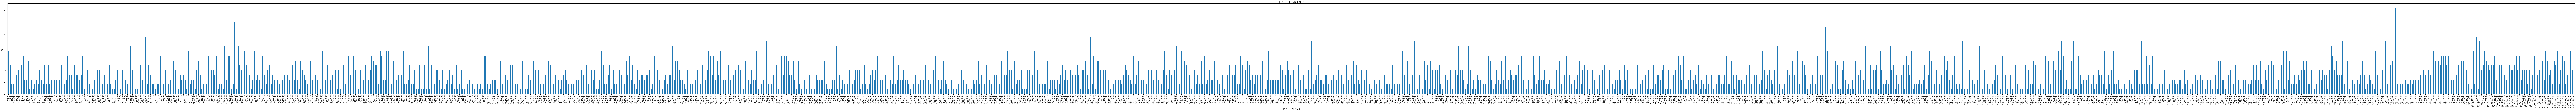

In [67]:
%matplotlib inline

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 나눔고딕 폰트의 경로로 변경해주세요.
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 그래프 그리기
plt.rcParams['figure.figsize'] = [280, 10]
rcp_igd_summary.plot(kind='bar', legend=None)
plt.xlabel('레시피 코드, 재료타입명', fontproperties=font_prop)  # 한글 폰트 적용
plt.ylabel('빈도', fontproperties=font_prop)  # 한글 폰트 적용
plt.title('레시피 코드, 재료타입명 별 빈도수', fontproperties=font_prop)  # 한글 폰트 적용
plt.savefig("test2.png")


In [69]:
plt.rcParams['figure.figsize'] = [10, 6]  # 그래프 크기 조정

# 범주형 데이터의 빈도 계산
grouped_counts = rcp_igd.groupby(['재료타입명','레시피 코드']).size().unstack(fill_value=1)
plt.rcParams['figure.figsize'] = [280, 10]
# 막대 그래프 그리기
grouped_counts.plot(kind='bar', stacked=False)

# 그래프 제목 및 축 레이블 설정
plt.title('Recipe Ingredient Category Distribution')
plt.xlabel('Ingredient Category')
plt.ylabel('Frequency')

# 그래프 출력
plt.savefig("test2.png")

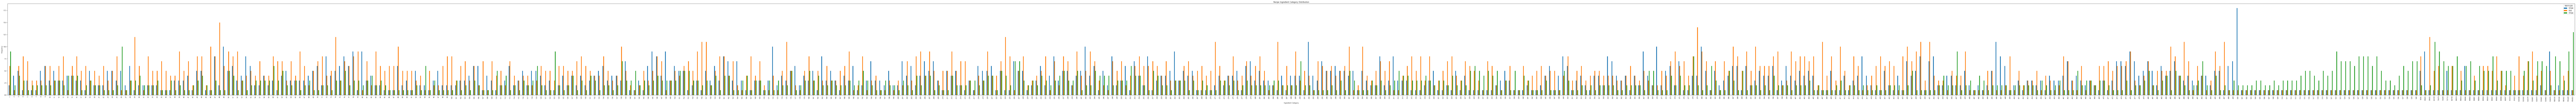

In [68]:
plt.rcParams['figure.figsize'] = [10, 6]  # 그래프 크기 조정

# 범주형 데이터의 빈도 계산
grouped_counts = rcp_igd.groupby(['레시피 코드', '재료타입명']).size().unstack(fill_value=1)
plt.rcParams['figure.figsize'] = [280, 10]
# 막대 그래프 그리기
grouped_counts.plot(kind='bar', stacked=False)

# 그래프 제목 및 축 레이블 설정
plt.title('Recipe Ingredient Category Distribution')
plt.xlabel('Ingredient Category')
plt.ylabel('Frequency')

# 그래프 출력
plt.savefig("test3.png")

In [88]:
# 재료타입별 빈도 계산
grouped_counts = rcp_igd.groupby(['재료타입명','레시피 코드']).size()

# print(grouped_counts)
grouped_counts.describe()

count    1554.000000
mean        3.927928
std         2.445797
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        18.000000
dtype: float64

In [90]:
grouped_counts = rcp_igd.groupby(['재료타입명', '레시피 코드']).size()
# print(grouped_counts)
grouped_counts_describe = grouped_counts.groupby('재료타입명').describe()
print(grouped_counts_describe)

       count      mean       std  min  25%  50%  75%   max
재료타입명                                                     
부재료    475.0  3.871579  2.252596  1.0  2.0  4.0  5.0  18.0
양념     504.0  5.248016  2.576078  1.0  3.0  5.0  7.0  15.0
주재료    575.0  2.817391  1.846848  1.0  1.5  2.0  3.0  13.0
